# Objectif
vous devrez produire un modèle permettant de prédire les prix des maisons de la ville de Aemes

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parametrage de l'affichage

In [2]:
pd.set_option("display.max_columns",81)
pd.set_option("display.max_row",100)
plt.rcParams["figure.figsize"] = [16,9]

# IMPORTATION DES DONNEES

In [3]:
data_train=pd.read_csv("train.csv")
#data_test=pd.read_csv("test.csv")
display(data_train.head())
#data_test.head())

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Copie du dataset d'entrainement

In [4]:
data=data_train.copy()
data.shape

(1460, 81)

### la variable Id ne nous servira pas pour la prediction, on decide de la supprimer

In [5]:
data.drop(columns=["Id"],inplace=True)
"Id" in data.columns

False

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

### verification des types de variables

In [7]:
data.dtypes.value_counts()

object     43
int64      34
float64     3
dtype: int64

## verification des valeurs manquantes

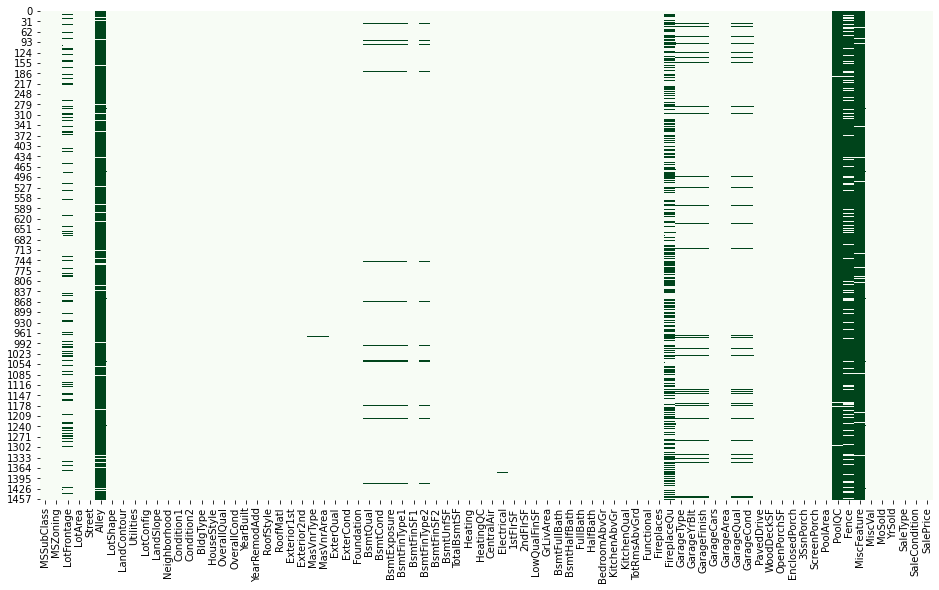

In [8]:
#visualisation des variables null
ax=sns.heatmap(data.isnull(),cmap="Greens",cbar=False)
plt.show()

In [9]:
#afficher les colonnes avec des valeurs manquantes
def filter(x):
    if(x>0): 
        return round(x*100,2)#pourcentage de valeur manquantes par colonne
info_manquant=(data.isnull().sum()/len(data)).sort_values(ascending=False).apply(lambda x :filter(x)).dropna()
info_manquant=info_manquant.reset_index().rename(columns={"index":"nom_colonne",0:"pourcent_nan"})
display(info_manquant.shape)
info_manquant

(19, 2)

nom_colonne  pourcent_nan
0         PoolQC         99.52
1    MiscFeature         96.30
2          Alley         93.77
3          Fence         80.75
4    FireplaceQu         47.26
5    LotFrontage         17.74
6    GarageYrBlt          5.55
7     GarageCond          5.55
8     GarageType          5.55
9   GarageFinish          5.55
10    GarageQual          5.55
11  BsmtExposure          2.60
12  BsmtFinType2          2.60
13      BsmtCond          2.53
14      BsmtQual          2.53
15  BsmtFinType1          2.53
16    MasVnrArea          0.55
17    MasVnrType          0.55
18    Electrical          0.07

### Conclusion : On decide de supprimer les variables ayant trop de valeurs manquantes( au moins 80%). Il s'agit des variables PoolQC, MiscFeature, Alley, Fence. <br> Puis on etudiera les autres variables de la liste en vue de remplacer les valeurs manquantes.

In [10]:
#suppression des colonnes manquante a 80%
del_col=info_manquant[info_manquant.pourcent_nan>80]["nom_colonne"]
display(del_col)
data.drop(columns=del_col,inplace=True)
#on verifie si les colonnes on ete supprimee
del_col[0] in data.columns

0         PoolQC
1    MiscFeature
2          Alley
3          Fence
Name: nom_colonne, dtype: object

False

In [11]:
#mise a jour de la variable contenant les info manquant
info_manquant.drop(index=info_manquant[info_manquant.pourcent_nan>80].index,inplace=True)
info_manquant=info_manquant.reset_index()
display(info_manquant.shape)
info_manquant

(15, 3)

index   nom_colonne  pourcent_nan
0       4   FireplaceQu         47.26
1       5   LotFrontage         17.74
2       6   GarageYrBlt          5.55
3       7    GarageCond          5.55
4       8    GarageType          5.55
5       9  GarageFinish          5.55
6      10    GarageQual          5.55
7      11  BsmtExposure          2.60
8      12  BsmtFinType2          2.60
9      13      BsmtCond          2.53
10     14      BsmtQual          2.53
11     15  BsmtFinType1          2.53
12     16    MasVnrArea          0.55
13     17    MasVnrType          0.55
14     18    Electrical          0.07

## REMPLACONS LES VALEURS MANQUANTES

In [12]:
#on verifie les valeurs uniques de chaque variable categorielle avec des valeurs manquantes
list_v_categor=[]
for col in info_manquant.nom_colonne:
    if(data[col].dtype=="object"):
        list_v_categor.append(col)
        display(col, data[col].unique())
    else:
        print("variable numerique : "+col)

'FireplaceQu'

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

variable numerique : LotFrontage
variable numerique : GarageYrBlt


'GarageCond'

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

'GarageType'

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

'GarageFinish'

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

'GarageQual'

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

'BsmtExposure'

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

'BsmtFinType2'

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

'BsmtCond'

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

'BsmtQual'

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

'BsmtFinType1'

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

variable numerique : MasVnrArea


'MasVnrType'

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

'Electrical'

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [13]:
#dans le fichier description.txt, la valeur NA peut etre definit pour certaines variables categoriques dont la valeur n'a pas ete definit.
# il s'agit des variables 
#FireplaceQu, GarageCond, GarageType, GarageFinish, GarageQual, BsmtExposure, BsmtFinType2, BsmtCond, BsmtQual, BsmtFinType1 => NA
#De meme pour la variable MasVnrType dont la valeur non definit est None
data=data.fillna(value={"FireplaceQu": "NA", "GarageCond": "NA", "GarageType": "NA", "GarageFinish": "NA", "GarageQual": "NA", "BsmtExposure": "NA", "BsmtFinType2": "NA", "BsmtCond": "NA", "BsmtQual": "NA", "BsmtFinType1": "NA"})
#MasVnrType +> None
data=data.fillna(value={"MasVnrType": "None"})
#Electrical par la valeur Mix
data.Electrical.fillna("Mix",inplace=True)
#LotFrontage , GarageYrBlt , MasVnrArea

In [14]:
#travailler les variables liee au garage
#toute les lignes ayant un Garatype na doivent avoir les autres variables liee au garage a NA egalement
#GarageYrBlt : on decide de mettre la valeur 0 aux valeurs manquantes
data=data.fillna(value={"GarageYrBlt": 0})
display(data[data.GarageType=="NA"][["GarageType","GarageYrBlt","GarageFinish","GarageCars","GarageArea","GarageQual","GarageCond"]])

GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual  \
39           NA          0.0           NA           0           0         NA   
48           NA          0.0           NA           0           0         NA   
78           NA          0.0           NA           0           0         NA   
88           NA          0.0           NA           0           0         NA   
89           NA          0.0           NA           0           0         NA   
99           NA          0.0           NA           0           0         NA   
108          NA          0.0           NA           0           0         NA   
125          NA          0.0           NA           0           0         NA   
127          NA          0.0           NA           0           0         NA   
140          NA          0.0           NA           0           0         NA   
148          NA          0.0           NA           0           0         NA   
155          NA          0.0           NA           0           0         NA   
163          NA          0.0           NA           0           0         NA   
165          NA          0.0           NA           0           0         NA   
198          NA          0.0           NA           0           0         NA   
210          NA          0.0           NA           0           0         NA   
241          NA          0.0           NA           0           0         NA   
250          NA          0.0           NA           0           0         NA   
287          NA          0.0           NA           0           0         NA   
291          NA          0.0           NA           0           0         NA   
307          NA          0.0           NA           0           0         NA   
375          NA          0.0           NA           0           0         NA   
386          NA          0.0           NA           0           0         NA   
393          NA          0.0           NA           0           0         NA   
431          NA          0.0           NA           0           0         NA   
434          NA          0.0           NA           0           0         NA   
441          NA          0.0           NA           0           0         NA   
464          NA          0.0           NA           0           0         NA   
495          NA          0.0           NA           0           0         NA   
520          NA          0.0           NA           0           0         NA   
528          NA          0.0           NA           0           0         NA   
533          NA          0.0           NA           0           0         NA   
535          NA          0.0           NA           0           0         NA   
562          NA          0.0           NA           0           0         NA   
582          NA          0.0           NA           0           0         NA   
613          NA          0.0           NA           0           0         NA   
614          NA          0.0           NA           0           0         NA   
620          NA          0.0           NA           0           0         NA   
635          NA          0.0           NA           0           0         NA   
636          NA          0.0           NA           0           0         NA   
638          NA          0.0           NA           0           0         NA   
649          NA          0.0           NA           0           0         NA   
705          NA          0.0           NA           0           0         NA   
710          NA          0.0           NA           0           0         NA   
738          NA          0.0           NA           0           0         NA   
750          NA          0.0           NA           0           0         NA   
784          NA          0.0           NA           0           0         NA   
826          NA          0.0           NA           0           0         NA   
843          NA          0.0           NA           0           0         NA   
921  

In [15]:
#travailler les variables liee au sous_soul
display(data[data.BsmtQual=="NA"][["BsmtQual","BsmtCond","BsmtExposure","TotalBsmtSF","BsmtUnfSF","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2"]])

BsmtQual BsmtCond BsmtExposure  TotalBsmtSF  BsmtUnfSF BsmtFinType1  \
17         NA       NA           NA            0          0           NA   
39         NA       NA           NA            0          0           NA   
90         NA       NA           NA            0          0           NA   
102        NA       NA           NA            0          0           NA   
156        NA       NA           NA            0          0           NA   
182        NA       NA           NA            0          0           NA   
259        NA       NA           NA            0          0           NA   
342        NA       NA           NA            0          0           NA   
362        NA       NA           NA            0          0           NA   
371        NA       NA           NA            0          0           NA   
392        NA       NA           NA            0          0           NA   
520        NA       NA           NA            0          0           NA   
532        NA       NA           NA            0          0           NA   
533        NA       NA           NA            0          0           NA   
553        NA       NA           NA            0          0           NA   
646        NA       NA           NA            0          0           NA   
705        NA       NA           NA            0          0           NA   
736        NA       NA           NA            0          0           NA   
749        NA       NA           NA            0          0           NA   
778        NA       NA           NA            0          0           NA   
868        NA       NA           NA            0          0           NA   
894        NA       NA           NA            0          0           NA   
897        NA       NA           NA            0          0           NA   
984        NA       NA           NA            0          0           NA   
1000       NA       NA           NA            0          0           NA   
1011       NA       NA           NA            0          0           NA   
1035       NA       NA           NA            0          0           NA   
1045       NA       NA           NA            0          0           NA   
1048       NA       NA           NA            0          0           NA   
1049       NA       NA           NA            0          0           NA   
1090       NA       NA           NA            0          0           NA   
1179       NA       NA           NA            0          0           NA   
1216       NA       NA           NA            0          0           NA   
1218       NA       NA           NA            0          0           NA   
1232       NA       NA           NA            0          0           NA   
1321       NA       NA           NA            0          0           NA   
1412       NA       NA           NA            0          0           NA   

      BsmtFinSF1 BsmtFinType2  BsmtFinSF2  
17             0           NA           0  
39             0           NA           0  
90             0           NA           0  
102            0           NA           0  
156            0           NA           0  
182            0           NA           0  
259            0           NA           0  
342            0           NA           0  
362            0           NA           0  
371            0           NA           0  
392            0           NA           0  
520            0           NA           0  
532            0           NA           0  
533            0           NA           0  
553            0           NA           0  
646            0           NA           0  
705            0           NA           0  
736            0           NA           0  
749            0           NA           0  
778            0           NA           0  
868            0           NA           0  
894            0           NA           0  
897            0           NA           0  
984            0           NA           0  
1000           0

In [16]:
#visionner les variables masvnr
display(data[data.MasVnrArea.isnull()][["MasVnrType","MasVnrArea"]])

MasVnrType  MasVnrArea
234        None         NaN
529        None         NaN
650        None         NaN
936        None         NaN
973        None         NaN
977        None         NaN
1243       None         NaN
1278       None         NaN

#### Toute les lignes dont la variable masVnrArea a une valeur null ont aussi une valeur de la variable MasVnrType a None.<br>on en deduit que c'est parceque ces maison m'ont pas de facade. On remplacera la valeur none de cette variable par 0.

In [17]:
#remplacer la valeur de masVnrArea par 0.
data=data.fillna(value={"MasVnrArea": 0})

<AxesSubplot:>

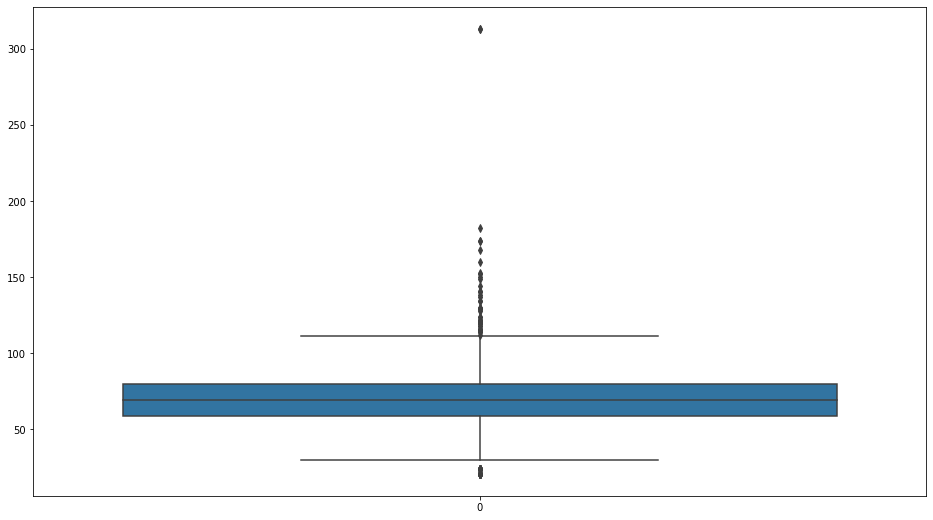

In [18]:
#traitement de la variable LotFrontage
sns.boxplot(data=data.LotFrontage)

In [19]:
data.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

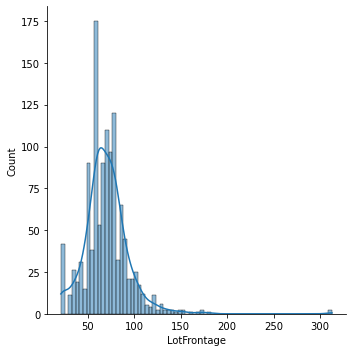

In [20]:
sns.displot(x=data.LotFrontage,kde=True)

In [21]:
data[["LotFrontage","SalePrice"]].corr()

LotFrontage  SalePrice
LotFrontage     1.000000   0.351799
SalePrice       0.351799   1.000000

In [22]:
#il y a beaucoup d'outliers dans la variable LotFrontage
#cependant, cette variable a une correlation non negligeable avec la variable cible.
#je decide donc de la garder
#et j'utilise la mediane pour remplacer les valeur manquantes
data['LotFrontage'].fillna(data.LotFrontage.median(), inplace=True)

In [23]:
#on verifie qu'il n'y a plus de valeur manquantes
data.columns[data.isnull().sum()>0]

Index([], dtype='object')

## Verification des valeurs des variables

In [24]:
#la variable MSSubClass, est une variable categorielle representer sous fome numerique
data.MSSubClass=data.MSSubClass.astype("str")
#data.MSSubClass=data.MSSubClass.map({20:"1-STORY 1946 & NEWER ALL STYLES",\
#        30:"1-STORY 1945 & OLDER",\
#        40:"1-STORY W/FINISHED ATTIC ALL AGES",\
 #       45:"1-1/2 STORY - UNFINISHED ALL AGES",\
  #      50:"1-1/2 STORY FINISHED ALL AGES",\
   #     60:"2-STORY 1946 & NEWER",\
    #    70:"2-STORY 1945 & OLDER",\
     #   75:"2-1/2 STORY ALL AGES",\
      #  80:"SPLIT OR MULTI-LEVEL",\
       # 85:"SPLIT FOYER",\
       # 90:"DUPLEX - ALL STYLES AND AGES",\
       #120:"1-STORY PUD (Planned Unit Development) - 1946 & NEWER",\
      # 150:"1-1/2 STORY PUD - ALL AGES",\
     #  160:"2-STORY PUD - 1946 & NEWER",\
      # 180:"PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",\
       #190:"2 FAMILY CONVERSION - ALL STYLES AND AGES"})
data.MSSubClass.unique()

array(['60', '20', '70', '50', '190', '45', '90', '120', '30', '85', '80',
       '160', '75', '180', '40'], dtype=object)

In [25]:
#les variables du dataset ordinal representer sous forme de chaine. on essaie de les remettre en valeur ordinal 
data.ExterQual=data.ExterQual.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data.ExterCond=data.ExterCond.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data.BsmtQual=data.BsmtQual.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0})
data.BsmtCond=data.BsmtCond.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0})
data.HeatingQC=data.HeatingQC.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data.KitchenQual=data.KitchenQual.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1})
data.FireplaceQu=data.FireplaceQu.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0})
data.GarageQual=data.GarageQual.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0})
data.GarageCond=data.GarageCond.map({"Ex":5,"Gd":4,"TA":3,"Fa":2,"Po":1,"NA":0})
#verification des modif
for col in ["ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond"]:
    display(data[col].unique())


array([4, 3, 5, 2], dtype=int64)

array([3, 4, 2, 1, 5], dtype=int64)

array([4, 3, 5, 0, 2], dtype=int64)

array([3, 4, 0, 2, 1], dtype=int64)

array([5, 4, 3, 2, 1], dtype=int64)

array([4, 3, 5, 2], dtype=int64)

array([0, 3, 4, 2, 5, 1], dtype=int64)

array([3, 2, 4, 0, 5, 1], dtype=int64)

array([3, 2, 0, 4, 1, 5], dtype=int64)

# CORRELATION DES VARIABLES

In [26]:
c=list(data.select_dtypes(exclude="object").columns)
#c.remove("SalePrice")
data_cor=data[c].corr()
print(c)

['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


In [27]:
#correlation avec la variable SalePrice
info_cor=data_cor.SalePrice.sort_values(ascending=False).reset_index().rename(columns={"SalePrice":"Taux"})
info_cor

index      Taux
0       SalePrice  1.000000
1     OverallQual  0.790982
2       GrLivArea  0.708624
3       ExterQual  0.682639
4     KitchenQual  0.659600
5      GarageCars  0.640409
6      GarageArea  0.623431
7     TotalBsmtSF  0.613581
8        1stFlrSF  0.605852
9        BsmtQual  0.585207
10       FullBath  0.560664
11   TotRmsAbvGrd  0.533723
12      YearBuilt  0.522897
13    FireplaceQu  0.520438
14   YearRemodAdd  0.507101
15     MasVnrArea  0.472614
16     Fireplaces  0.466929
17      HeatingQC  0.427649
18     BsmtFinSF1  0.386420
19    LotFrontage  0.334771
20     WoodDeckSF  0.324413
21       2ndFlrSF  0.319334
22    OpenPorchSF  0.315856
23       HalfBath  0.284108
24     GarageQual  0.273839
25        LotArea  0.263843
26     GarageCond  0.263191
27    GarageYrBlt  0.261366
28   BsmtFullBath  0.227122
29      BsmtUnfSF  0.214479
30       BsmtCond  0.212607
31   BedroomAbvGr  0.168213
32    ScreenPorch  0.111447
33       PoolArea  0.092404
34         MoSold  0.046432
35      3SsnPorch  0.044584
36      ExterCond  0.018899
37     BsmtFinSF2 -0.011378
38   BsmtHalfBath -0.016844
39        MiscVal -0.021190
40   LowQualFinSF -0.025606
41         YrSold -0.028923
42    OverallCond -0.077856
43  EnclosedPorch -0.128578
44   KitchenAbvGr -0.135907

In [28]:
#on decide de garder les variables numerique qui ont au moins 40% de correlation positive ou negative avec la variable cible.
variable=info_cor[abs(info_cor.Taux)<0.40]["index"]
data.drop(columns=variable,inplace=True)
print(data.shape)

(1460, 49)


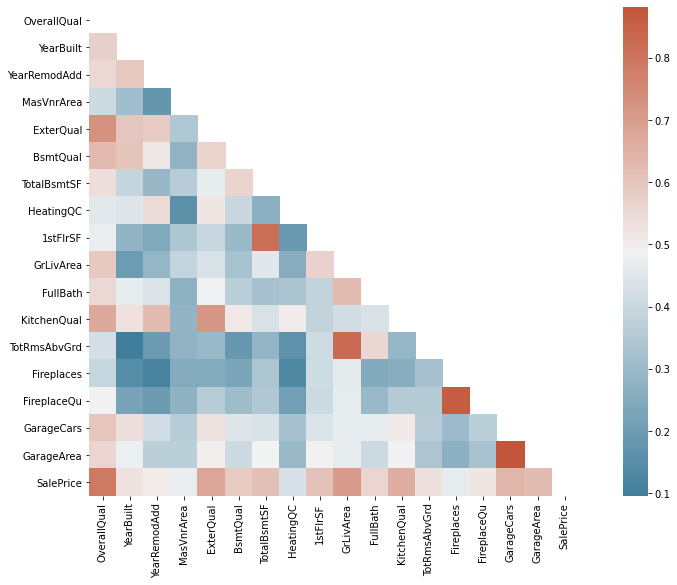

In [29]:
#correlation des variables entre elle
def Show_Corr():
    data_cor=data.corr()
    mask = np.triu(np.ones_like(data_cor, dtype=bool))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(data=data_cor,annot=False, fmt=".2f",square=True,mask=mask,cmap=cmap)
Show_Corr()

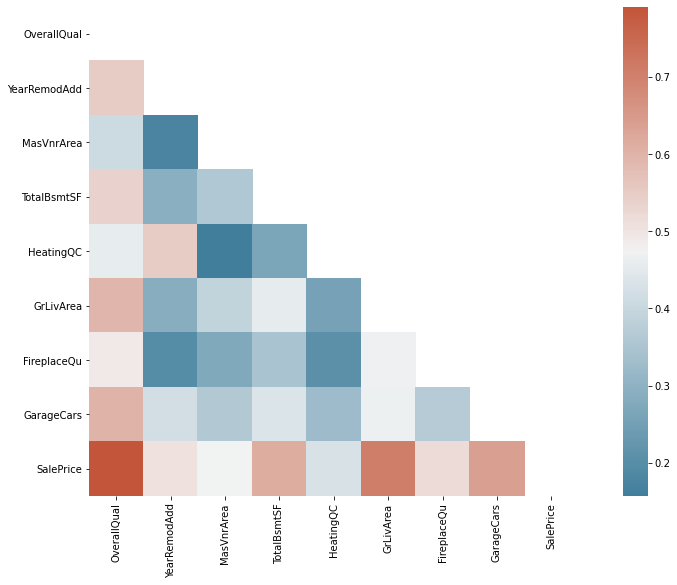

In [30]:
#suppression des variables d'entree ayant une trop forte correlation entre elle en sauvegardant 
#celle qui a une meilleur correlaton avec la variable cible
    #on supprime les variables KitchenQual, ExterQual, BmstQual et Yearbuilt car ayant une forte correlation avec la variable OverallQual
    #on supprime la variable FirePlace car ayant une forte correlation avec la variable FirePlaceQu
    #on supprime la variable GarageArea car ayant une forte correlation avec la variabe GarageCars
    #on supprime la variable TotRmsAbvGrd,FullBath car ayant une forte correlation avec la variable GrLivArea
    #on supprime la variable 1stFlrSF
    
data.drop(columns=["KitchenQual","ExterQual","BsmtQual","YearBuilt","Fireplaces","GarageArea","TotRmsAbvGrd","FullBath","1stFlrSF"],inplace=True)
Show_Corr()

# Gestion des valeurs aberrantes
Certaines variables ont des valeurs numeriques mais representes des variables categorielle ordinal.
On les elimine de la liste des variables numeriques a afficher

In [31]:
#regroupement par type de variable
#categoric_ = X.select_dtypes(include=['object']).copy()
#ordinal_ = X.select_dtypes(include=['object']).copy()
#disc_num_var = ['OverallQual','OverallCond',"ExterQual","ExterCond","BsmtQual","BsmtCond","HeatingQC","KitchenQual","FireplaceQu","GarageQual","GarageCond",
#    'BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold']

nombre de variable : 9
Nombre de Ligne : 3. Nombre de colonne : 3


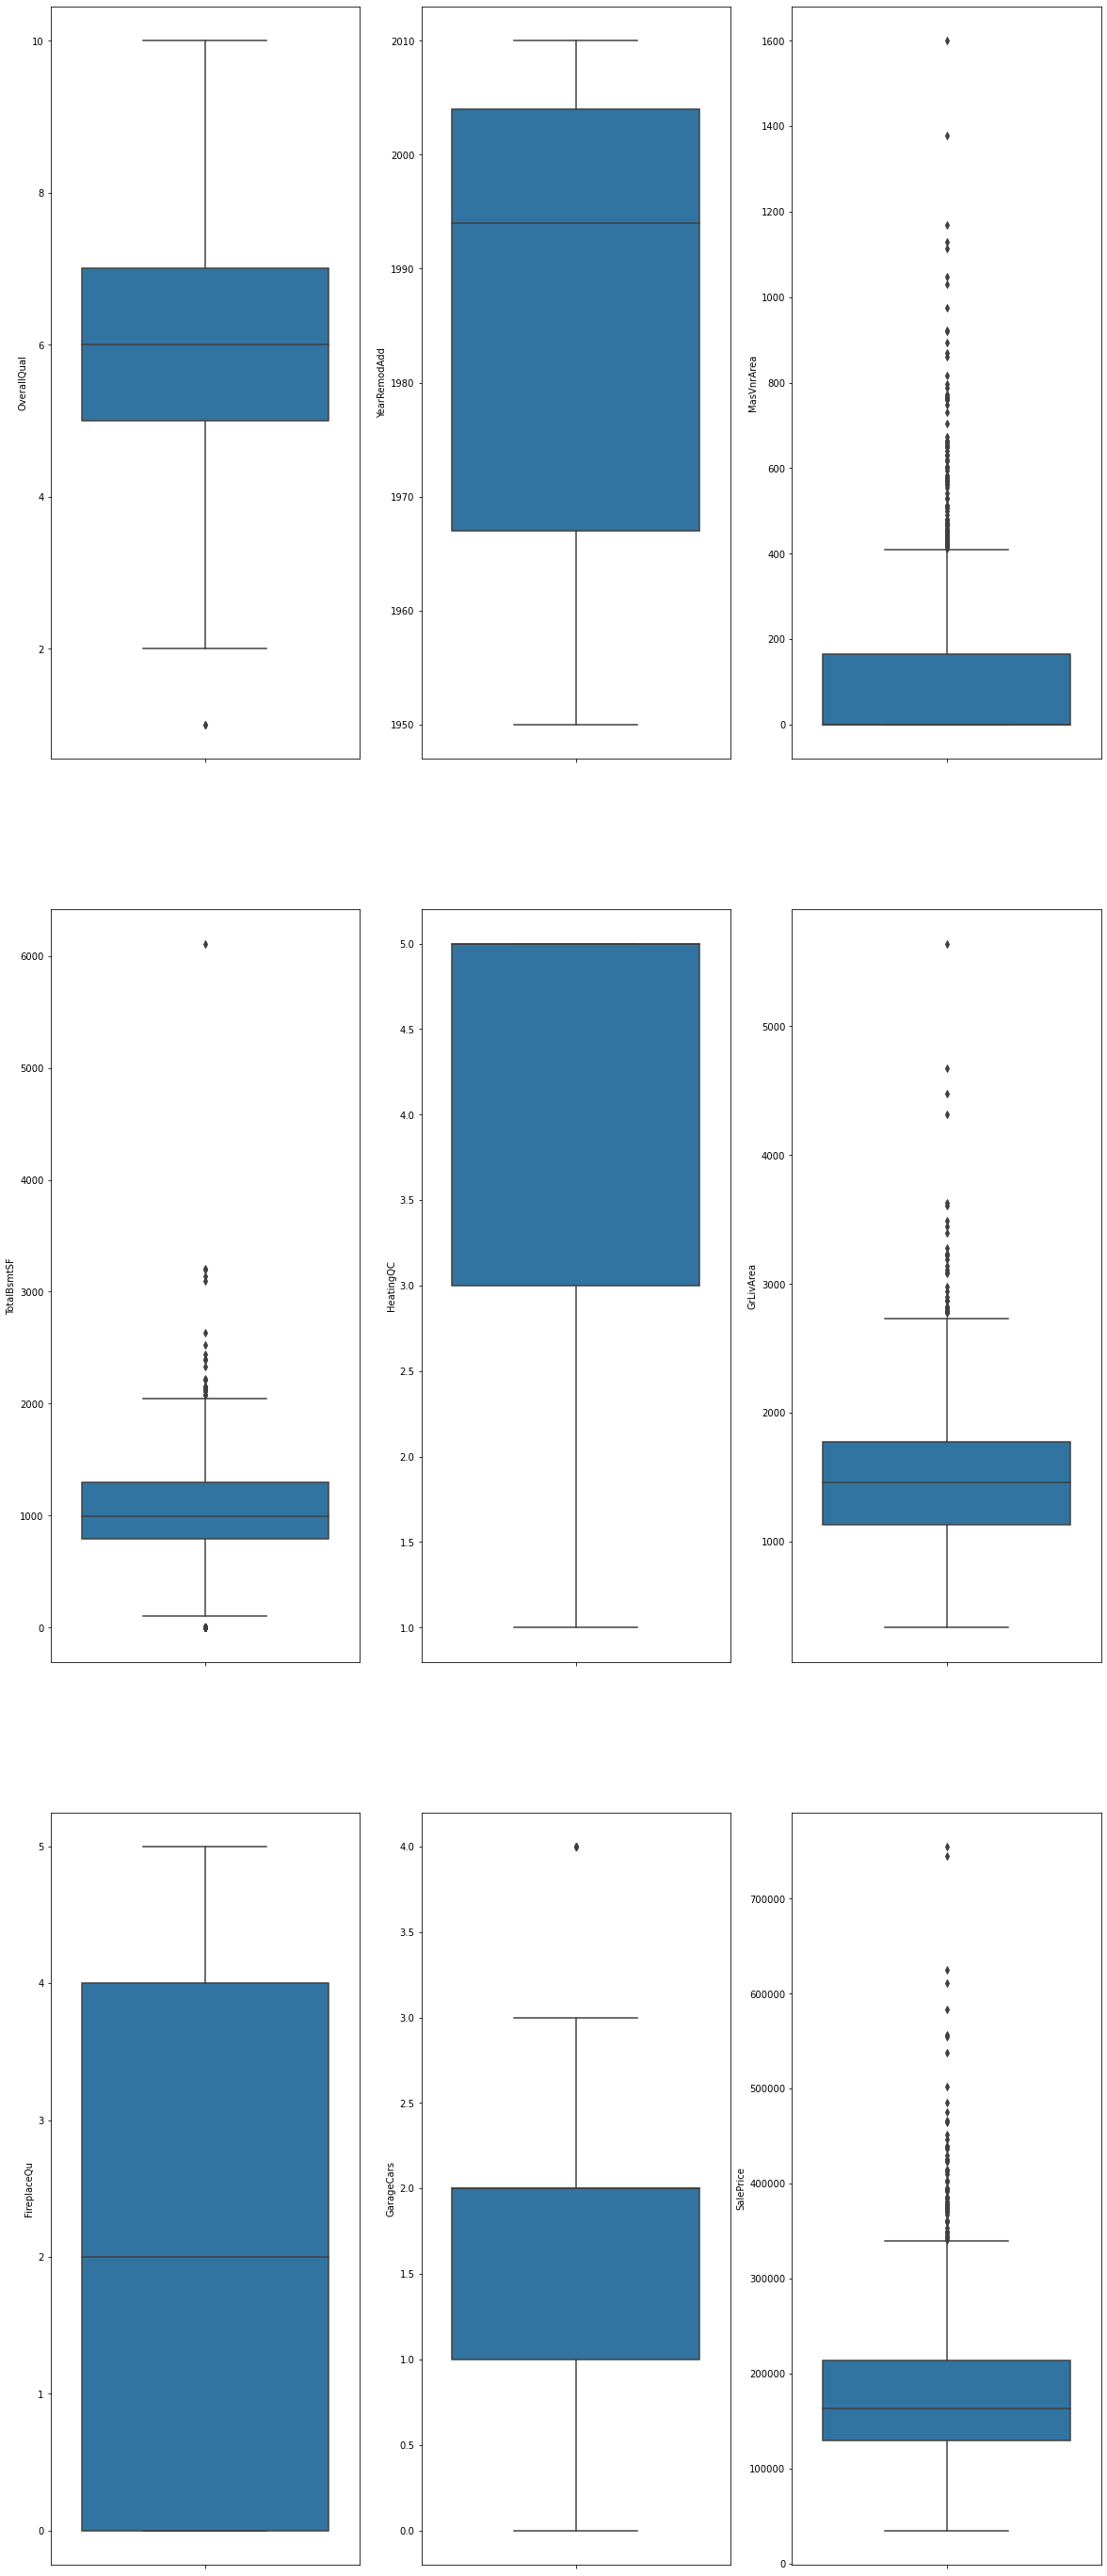

In [32]:
#visualisation des variables numeriques sur un boxplot
def show_boxplot():  
    num_var=data.select_dtypes(exclude="object").columns
    #plusieurs variable parmi elle sont ordinal.
    #on affichera donc pas de boxplot pour eux
    nb_num_var=len(num_var)
    print("nombre de variable : "+ str(nb_num_var))
    ##on veut avoir 3 colonne par ligne. on calcul le nombre de ligne qu il faut
    nb_col=3
    nb_ligne=nb_num_var//nb_col if nb_num_var%nb_col==0 else nb_num_var//nb_col + 1

    fig, axs = plt.subplots(nb_ligne,nb_col,figsize=(20,50))
    #fig.tight_layout()
    i=-1
    print(f"Nombre de Ligne : {nb_ligne}. Nombre de colonne : {nb_col}")
    for row in range(nb_ligne):
        for col in range(nb_col):
            i=i+1
            sns.boxplot(y=data[num_var[i]],ax=axs[row,col])
            if(i==nb_num_var-1): 
                break;
show_boxplot()

shape : (1460, 40)
neew shape : (1360, 39)
nombre de variable : 8
Nombre de Ligne : 3. Nombre de colonne : 3


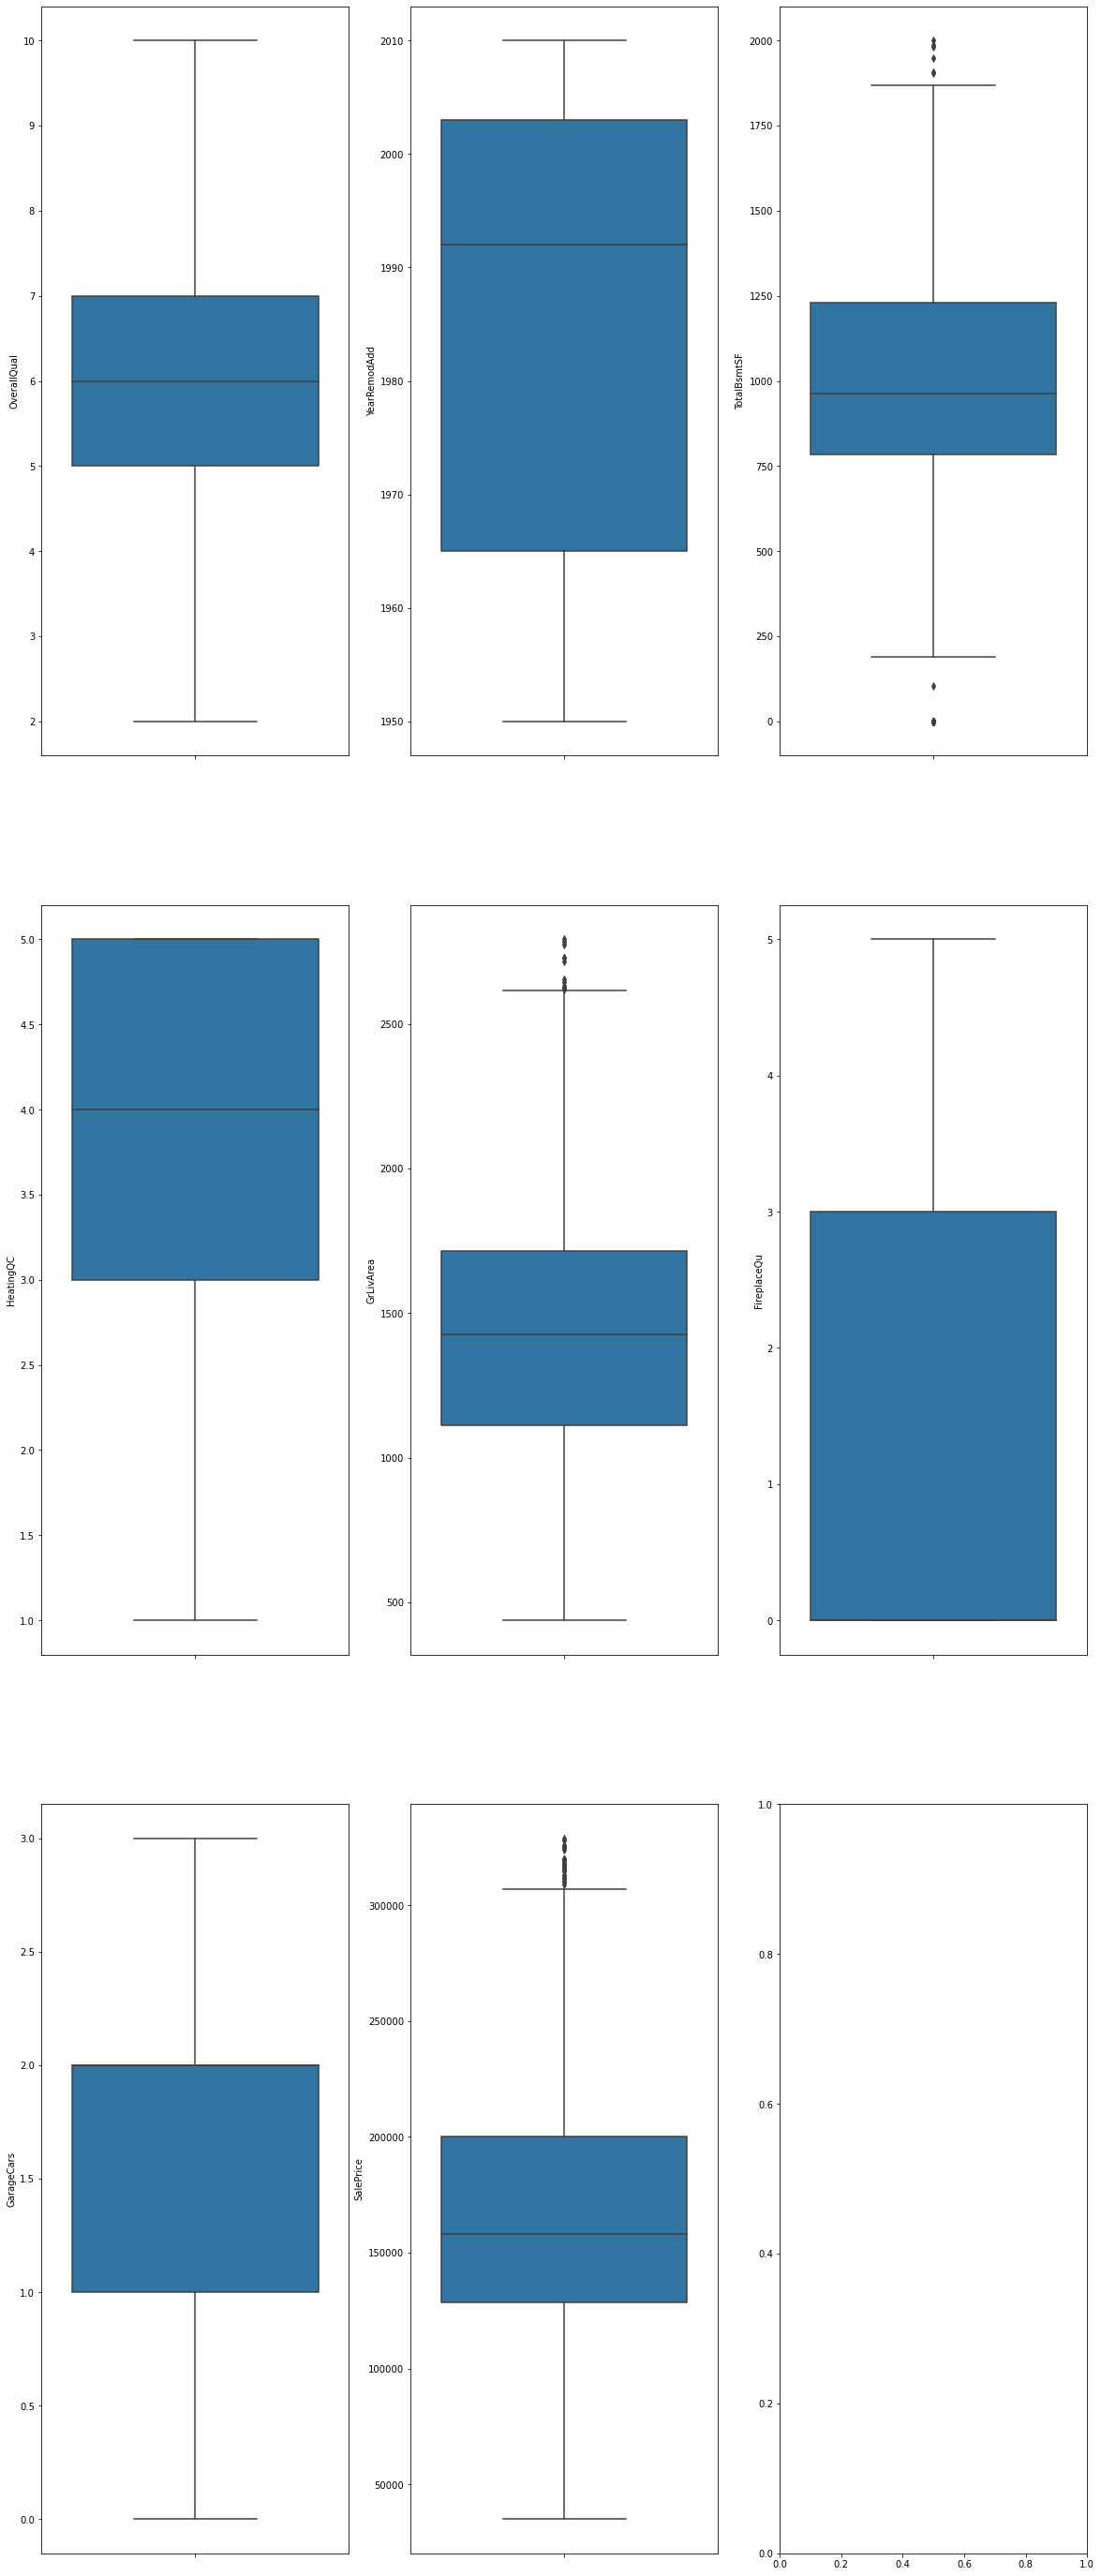

In [33]:
print("shape :", data.shape)
#suppression des valeurs aberrantes de la variables OverallQual
data.drop(index=data[(data.OverallQual<2)].index,inplace=True)
#suppression de la variable masvnrArea car trop de valeur aberrante et correlation avec la variable cible inferieur a 50%
data.drop(columns=["MasVnrArea"],inplace=True)
#suppression de valeur aberrante de la variable TotalBsmtSF
data.drop(index=data[(data.TotalBsmtSF<0)].index,inplace=True)
data.drop(index=data[(data.TotalBsmtSF>2000)].index,inplace=True)
#suppression de valeur aberrante de la variable GrLivArea
data.drop(index=data[(data.GrLivArea>2800)].index,inplace=True)
#suppression de valeur aberrante de la variable GarageCars
data.drop(index=data[(data.GarageCars>=4)].index,inplace=True)
#suppression de valeur aberrante de la variable SalePrice
data.drop(index=data[(data["SalePrice"]>330000)].index,inplace=True)
print("neew shape :", data.shape)
show_boxplot()

In [34]:
#division du dataste en deux partie test et entrainement
cat_col=data.select_dtypes(include="object").columns
for col in cat_col:
    display(data[col].value_counts())

20     493
60     261
50     140
120     85
30      68
160     63
70      58
80      56
90      50
190     28
85      20
75      12
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

RL         1060
RM          213
FV           62
RH           15
C (all)      10
Name: MSZoning, dtype: int64

Pave    1354
Grvl       6
Name: Street, dtype: int64

Reg    878
IR1    439
IR2     35
IR3      8
Name: LotShape, dtype: int64

Lvl    1229
Bnk      59
HLS      41
Low      31
Name: LandContour, dtype: int64

AllPub    1359
NoSeWa       1
Name: Utilities, dtype: int64

Inside     984
Corner     243
CulDSac     84
FR2         45
FR3          4
Name: LotConfig, dtype: int64

Gtl    1292
Mod      57
Sev      11
Name: LandSlope, dtype: int64

NAmes      216
CollgCr    148
OldTown    110
Edwards     97
Somerst     82
Gilbert     78
Sawyer      74
NWAmes      71
SawyerW     57
BrkSide     57
Mitchel     47
NridgHt     46
Crawfor     46
IDOTRR      37
Timber      33
ClearCr     27
NoRidge     24
SWISU       23
MeadowV     17
Blmngtn     17
StoneBr     16
BrDale      16
Veenker     10
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64

Norm      1172
Feedr       79
Artery      45
RRAn        25
PosN        14
RRAe        11
PosA         7
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

Norm      1347
Feedr        6
Artery       2
RRNn         2
PosA         1
RRAe         1
RRAn         1
Name: Condition2, dtype: int64

1Fam      1126
TwnhsE     112
Duplex      50
Twnhs       43
2fmCon      29
Name: BldgType, dtype: int64

1Story    679
2Story    403
1.5Fin    150
SLvl       63
SFoyer     36
1.5Unf     14
2.5Unf     11
2.5Fin      4
Name: HouseStyle, dtype: int64

Gable      1098
Hip         232
Flat         12
Gambrel      11
Mansard       5
Shed          2
Name: RoofStyle, dtype: int64

CompShg    1342
Tar&Grv      10
WdShake       3
WdShngl       2
Membran       1
Metal         1
Roll          1
Name: RoofMatl, dtype: int64

VinylSd    468
HdBoard    217
MetalSd    212
Wd Sdng    196
Plywood    105
CemntBd     48
BrkFace     44
WdShing     24
AsbShng     20
Stucco      20
BrkComm      2
Stone        1
CBlock       1
AsphShn      1
ImStucc      1
Name: Exterior1st, dtype: int64

VinylSd    457
MetalSd    206
HdBoard    200
Wd Sdng    189
Plywood    139
CmentBd     47
Wd Shng     35
Stucco      22
BrkFace     21
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        4
AsphShn      3
CBlock       1
Other        1
Name: Exterior2nd, dtype: int64

None       844
BrkFace    402
Stone       99
BrkCmn      15
Name: MasVnrType, dtype: int64

CBlock    617
PConc     570
BrkTil    142
Slab       23
Stone       5
Wood        3
Name: Foundation, dtype: int64

No    919
Av    201
Mn    104
Gd     99
NA     37
Name: BsmtExposure, dtype: int64

Unf    412
GLQ    355
ALQ    211
BLQ    145
Rec    130
LwQ     71
NA      36
Name: BsmtFinType1, dtype: int64

Unf    1166
Rec      51
LwQ      44
NA       36
BLQ      31
ALQ      18
GLQ      14
Name: BsmtFinType2, dtype: int64

GasA     1330
GasW       16
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

Y    1269
N      91
Name: CentralAir, dtype: int64

SBrkr    1238
FuseA      91
FuseF      26
FuseP       3
Mix         2
Name: Electrical, dtype: int64

Typ     1265
Min2      34
Min1      31
Mod       13
Maj1      11
Maj2       5
Sev        1
Name: Functional, dtype: int64

Attchd     801
Detchd     381
NA          77
BuiltIn     70
Basment     17
CarPort      9
2Types       5
Name: GarageType, dtype: int64

Unf    594
RFn    401
Fin    288
NA      77
Name: GarageFinish, dtype: int64

Y    1243
N      87
P      30
Name: PavedDrive, dtype: int64

WD       1204
New        87
COD        42
ConLD       9
ConLw       5
CWD         4
ConLI       4
Oth         3
Con         2
Name: SaleType, dtype: int64

Normal     1140
Abnorml      97
Partial      90
Family       20
Alloca        9
AdjLand       4
Name: SaleCondition, dtype: int64

In [35]:
#on supprime les variables Street ,MSZoning, Utilities car distribution trop inequitable
data.drop(columns=["Street","Utilities"],inplace=True)

# Visualisation de la variable SalePrice en vue d'evaluer une possible transformation de la variable

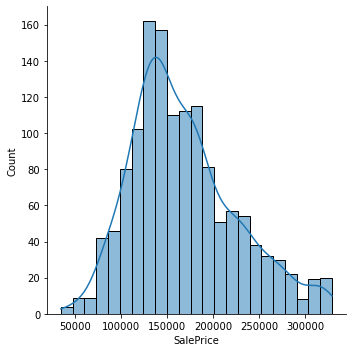

In [36]:
sns.displot(data.SalePrice,kde=True)

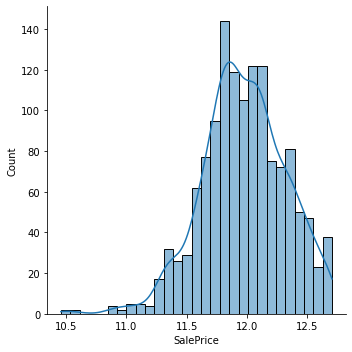

In [37]:
sns.displot(np.log1p(data.SalePrice),kde=True)

# Conclusion : la distribution est meilleure sans transformation. elle epouse une forme plus normale. 

In [38]:
#transformation des variables
data_t=pd.get_dummies(data.select_dtypes("object"))
data_t=pd.concat([data.select_dtypes(exclude="object"),data_t],axis=1)
#apres une premiere execution, j'ai remarque que le resultat n'etait pas concluant sans transformation de la variable cible
#data_t.SalePrice=np.log1p(data.SalePrice)
display(data_t.head())
data_t.head()

OverallQual  YearRemodAdd  TotalBsmtSF  HeatingQC  GrLivArea  FireplaceQu  \
0            7          2003          856          5       1710            0   
1            6          1976         1262          5       1262            3   
2            7          2002          920          5       1786            3   
3            7          1970          756          4       1717            4   
4            8          2000         1145          5       2198            3   

   GarageCars  SalePrice  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0           2     208500               0               0               0   
1           2     181500               0               0               0   
2           2     223500               0               0               0   
3           3     140000               0               0               0   
4           3     250000               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0              0              0                 0            0            0   
1              0              0                 0            0            0   
2              0              0                 0            0            0   
3              0              0                 0            0            0   
4              0              0                 0            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            1            0             0             0             0   
1            1            0             0             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             1                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 1                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  ...  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0              0  ...                 0                 0               0   
1              0  ...                 0                 0               0   
2              0  ...                 0                 0               0   
3        

OverallQual  YearRemodAdd  TotalBsmtSF  HeatingQC  GrLivArea  FireplaceQu  \
0            7          2003          856          5       1710            0   
1            6          1976         1262          5       1262            3   
2            7          2002          920          5       1786            3   
3            7          1970          756          4       1717            4   
4            8          2000         1145          5       2198            3   

   GarageCars  SalePrice  MSSubClass_120  MSSubClass_160  MSSubClass_180  \
0           2     208500               0               0               0   
1           2     181500               0               0               0   
2           2     223500               0               0               0   
3           3     140000               0               0               0   
4           3     250000               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   
3               0              0              0              0              0   
4               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   
3              0              0              1              0              0   
4              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  MSZoning_C (all)  MSZoning_FV  MSZoning_RH  \
0              0              0                 0            0            0   
1              0              0                 0            0            0   
2              0              0                 0            0            0   
3              0              0                 0            0            0   
4              0              0                 0            0            0   

   MSZoning_RL  MSZoning_RM  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0            1            0             0             0             0   
1            1            0             0             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0             1                0                0                0   
1             1                0                0                0   
2             0                0                0                0   
3             0                0                0                0   
4             0                0                0                0   

   LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  LotConfig_FR2  \
0                1                 0                  0              0   
1                1                 0                  0              1   
2                1                 0                  0              0   
3                1                 1                  0              0   
4                1                 0                  0              1   

   LotConfig_FR3  ...  Electrical_FuseF  Electrical_FuseP  Electrical_Mix  \
0              0  ...                 0                 0               0   
1              0  ...                 0                 0               0   
2              0  ...                 0                 0               0   
3        

In [39]:
#division du dataset en deux partie
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(data_t.drop(columns="SalePrice"), data_t.SalePrice, test_size=0.3, random_state=120)

# PREMIER TEST DES RESULTATS DES MODELS AVEC LES VARIABLES CATEGORIELLES 

In [40]:
# define transform 
transformer = ColumnTransformer(\
        transformers= [('numeric_encoder', StandardScaler(), [0,1,2,3,4,5,6])]\
        ,remainder='passthrough'
)
#transformation des variables
X_train_1 = transformer.fit_transform(X_train)
X_test_1 = transformer.transform(X_test)

# linear model
linear_model = LinearRegression()
linear_model.fit(X_train_1, y_train)
y_pred = linear_model.predict(X_test_1)
print("Linear regression r2_score",  r2_score(y_test, y_pred))#doit etre eleve

#DecisionTreeRegressor
clr = DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=50, min_weight_fraction_leaf=0.0,
           random_state=None, splitter='best')
clr.fit(X_train_1, y_train)
print("DecisionTreeRegressor r2_score ",  r2_score(y_test,  clr.predict(X_test_1)))#doit etre eleve

#KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=13)#apres une variation du nombre de voisin, la valeur 13 est la meilleur
neigh.fit(X_train_1, y_train)
print("KNeighborsRegressor r2_score ",  r2_score(y_test,  neigh.predict(X_test_1)))#doit etre eleve

Linear regression r2_score -3.622242474639536e+18
DecisionTreeRegressor r2_score  0.7862466575129154
KNeighborsRegressor r2_score  0.8243694197208064


# SECOND TEST SANS LES VARIABLES CATEGORIELLES POUR LE LINEAR REGRESSION

In [41]:
#apres une premiere execution, an a remarque que les resultat avec les variables categorique n'etait pas satisfaisant
#avec le LinearRegression
#on decide donc de les supprimer du dataset pour la prediction
#la suppression est faite par defaut avec ColumnTransformer

# define transform 
transformer = ColumnTransformer(\
        transformers= [('numeric_encoder', StandardScaler(), [0,1,2,3,4,5,6])]\
        #,remainder='passthrough'
)
#transformation des variables
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

# linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred = linear_model.predict(X_test)
print("Linear regression r2_score",  r2_score(y_test, y_pred))#doit etre eleve

Linear regression r2_score 0.8441742214360566


# LES TROIS MODELES RETOURNE UN BON SCORE. LE LINEAR REGRESSION RETOURNANT LE MEILLEUR SCORE. on decide donc de le garder comme modele

### On peut exporter le modele dans un conteneur docker afin qu'il soit utilisable de tous.
## on exportera aussi le score
### pour cela, il faudra :
- exporter le modele avec JobLib.load() dans un fichier
- creer un environnement docker contenant les librairies anaconda et python en vue d'executer les scripts necessaires
- Ecrire le code python qui permettra de lire les variables d'entree et de retourner le Prix de la maison

## il est important de mettre a jour le modele car les prix des maisons fluctuent beaucoup et les conditions d'achats d'une maiosn peuvent changer.

## pour surveiller l'evolution du modele, on peut evaluer les predictions du modeles a chaque fois qu'il y a des fructuations importantes sur le marches et le mettre a jour si celui-ci ne retourne plus de resultat concluant.